In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
import seaborn as sns


In [ ]:
data= pd.read_csv("/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv")

In [23]:
data.head()

,review,sentiment,word count
0,One of the other reviewers has mentioned that ...,1,307
1,A wonderful little production. <br /><br />The...,1,162
2,I thought this was a wonderful way to spend ti...,1,166
3,Basically there's a family where a little boy ...,0,138
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,230


In [24]:
data.shape

(50000, 3)

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   review      50000 non-null  object
 1   sentiment   50000 non-null  int64 
 2   word count  50000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.1+ MB


In [26]:
type(data)

pandas.core.frame.DataFrame

In [27]:
data.tail()

,review,sentiment,word count
49995,I thought this movie did a down right good job...,1,194
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",0,112
49997,I am a Catholic taught in parochial elementary...,0,230
49998,I'm going to have to disagree with the previou...,0,212
49999,No one expects the Star Trek movies to be high...,0,129


In [28]:
data["sentiment"].value_counts()

sentiment
1    25000
0    25000
Name: count, dtype: int64

Text(0.5, 1.0, 'Sentiment distribution')

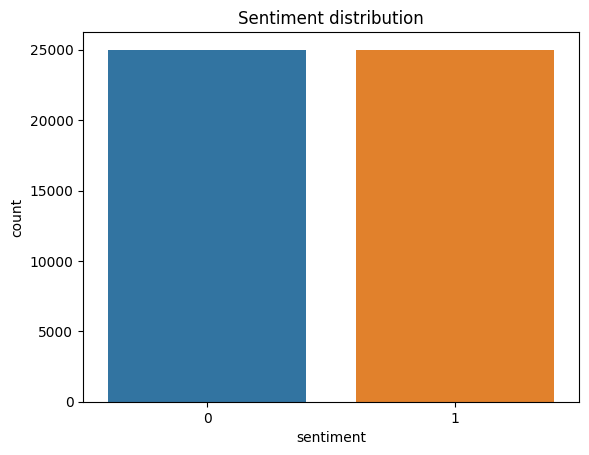

In [29]:
sns.countplot(x='sentiment',data=data)
plt.title("Sentiment distribution")

In [ ]:
#one hot encoding 
#label encoder

In [30]:
#positive->1
#negative->0
data.replace({"sentiment": {"positive":1,"negative":0}}, inplace=True)

In [31]:
data.head()

,review,sentiment,word count
0,One of the other reviewers has mentioned that ...,1,307
1,A wonderful little production. <br /><br />The...,1,162
2,I thought this was a wonderful way to spend ti...,1,166
3,Basically there's a family where a little boy ...,0,138
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,230


In [32]:
data.tail()

,review,sentiment,word count
49995,I thought this movie did a down right good job...,1,194
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",0,112
49997,I am a Catholic taught in parochial elementary...,0,230
49998,I'm going to have to disagree with the previou...,0,212
49999,No one expects the Star Trek movies to be high...,0,129


In [33]:
data["sentiment"].value_counts()

sentiment
1    25000
0    25000
Name: count, dtype: int64

In [34]:
def no_of_words(text):
    words=text.split()
    word_count=len(words)
    return word_count

In [35]:
data['word count']=data['review'].apply(no_of_words)

In [36]:
data.head()

,review,sentiment,word count
0,One of the other reviewers has mentioned that ...,1,307
1,A wonderful little production. <br /><br />The...,1,162
2,I thought this was a wonderful way to spend ti...,1,166
3,Basically there's a family where a little boy ...,0,138
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,230


In [37]:
def clean_review(review):
    str=''.join(word for word in review.split( )if word.lower()not in stopwords.words('english'))
    return str

In [38]:
data['review']=data['review'].apply(clean_review)

In [39]:
#wordcloud
!pip install wordcloud
from wordcloud import WordCloud


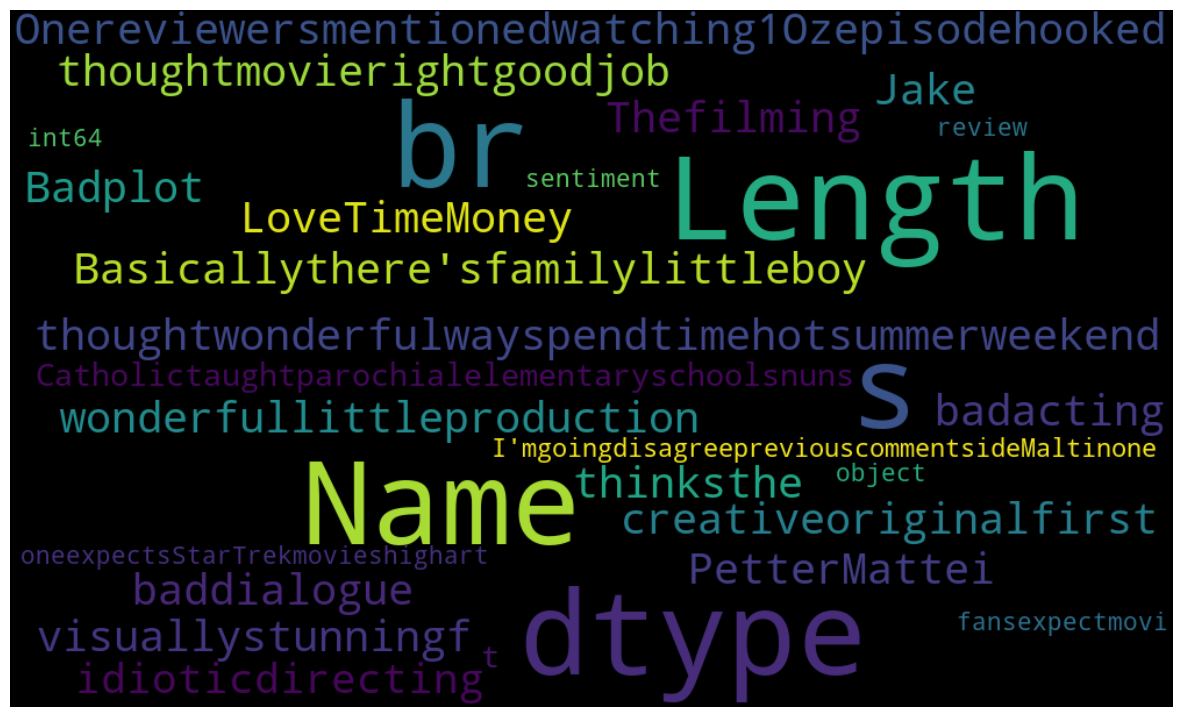

In [40]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
reviews =[data['review'], data['sentiment'],""]

# Join reviews if it's a list
if isinstance(reviews, list):
      reviews = " ".join(str(review) for review in reviews)

# Check if reviews is empty or contains only whitespace
if not reviews or len(reviews.strip()) == 0:
    print("No valid text to generate a word cloud.")
else:
    # Create a word cloud
    wordcloud = WordCloud(height=600, width=1000, max_font_size=100).generate(reviews)
    
    # Display the word cloud
    plt.figure(figsize=(15, 12))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')  # Hide axes
    plt.show()

In [42]:
#LSTM -> LONG SHOR TERM MEMORY
#RNN -> TEXTUAL DATA

In [43]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [44]:
model = LogisticRegression()

In [45]:
train_data, test_data = train_test_split(data, test_size = 0.2, random_state=42)

In [46]:
train_data.shape

(40000, 3)

In [48]:
test_data.shape

(10000, 3)

In [49]:
 tokenizer =Tokenizer(num_words = 5000)
tokenizer.fit_on_texts(train_data["review"])

In [50]:
X_train = pad_sequences(tokenizer.texts_to_sequences(train_data["review"]),maxlen=200)
X_test = pad_sequences(tokenizer.texts_to_sequences(test_data["review"]),maxlen=200)

In [51]:
X_train

array([[   0,    0,    0, ..., 1416,   41,    4],
       [   0,    0,    0, ...,    1,  436,  156],
       [   0,    0,    0, ...,    0,    0,    0],
       ...,
       [   0,    0,    0, ..., 1497,   25,  303],
       [   0,    0,    0, ...,  495,  900,    9],
       [   0,    0,    0, ...,    0,    0, 4317]], dtype=int32)

In [52]:
X_test

array([[   0,    0,    0, ...,  387,   17,    4],
       [   0,    0,    0, ...,    1,    1,    1],
       [   0,    0,    0, ...,    1,    1,    1],
       ...,
       [   0,    0,    0, ...,  327,  145, 1438],
       [   0,    0,    0, ...,    1, 2817,  554],
       [   0,    0,    0, ...,    0,    0, 1462]], dtype=int32)

In [53]:
Y_train = train_data["sentiment"]
Y_test = test_data["sentiment"]

In [54]:
Y_train

39087    0
30893    0
45278    1
16398    0
13653    0
        ..
11284    1
44732    1
38158    0
860      1
15795    1
Name: sentiment, Length: 40000, dtype: int64

In [55]:
model.fit(X_train,Y_train)

LogisticRegression()

In [56]:
predict = model.predict(X_test)

In [57]:
logreg = LogisticRegression()
logreg.fit(X_train,Y_train)
logreg_pred=logreg.predict(X_test)
logreg_acc=accuracy_score(logreg_pred,Y_test)
print("Test accuracy:{:.2f}%".format(logreg_acc*100))

Test accuracy:52.39%


In [58]:
print(confusion_matrix(Y_test,logreg_pred))
print("\n")
print(classification_report(Y_test,logreg_pred))

[[2583 2378]
 [2383 2656]]


              precision    recall  f1-score   support

           0       0.52      0.52      0.52      4961
           1       0.53      0.53      0.53      5039

    accuracy                           0.52     10000
   macro avg       0.52      0.52      0.52     10000
weighted avg       0.52      0.52      0.52     10000



In [59]:
mnb = MultinomialNB()
mnb.fit(X_train,Y_train)
mnb_pred=mnb.predict(X_test)
mnb_acc=accuracy_score(mnb_pred,Y_test)
print("Test accuracy:{:.2f}%".format(mnb_acc*100))

Test accuracy:50.43%


In [60]:
print(confusion_matrix(Y_test,mnb_pred))
print("\n")
print(classification_report(Y_test,mnb_pred))

[[1560 3401]
 [1556 3483]]


              precision    recall  f1-score   support

           0       0.50      0.31      0.39      4961
           1       0.51      0.69      0.58      5039

    accuracy                           0.50     10000
   macro avg       0.50      0.50      0.49     10000
weighted avg       0.50      0.50      0.49     10000



In [61]:
svc = LinearSVC()
svc.fit(X_train,Y_train)
svc_pred=svc.predict(X_test)
svc=accuracy_score(svc_pred,Y_test)
print("Test accuracy:{:.2f}%".format(svc*100))

Test accuracy:50.50%


In [62]:
print(confusion_matrix(Y_test,svc_pred))
print("\n")
print(classification_report(Y_test,svc_pred))

[[ 575 4386]
 [ 564 4475]]


              precision    recall  f1-score   support

           0       0.50      0.12      0.19      4961
           1       0.51      0.89      0.64      5039

    accuracy                           0.51     10000
   macro avg       0.50      0.50      0.42     10000
weighted avg       0.50      0.51      0.42     10000



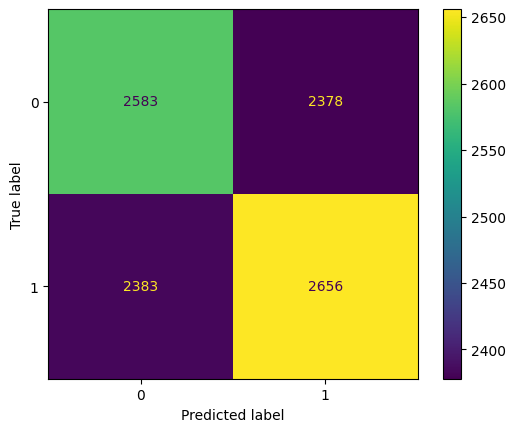

In [63]:

cm = confusion_matrix(Y_test, predict, labels=model.classes_)
display= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
display.plot()
plt.show()

In [64]:
#LSTM MODE BUILDING

In [65]:
model = Sequential()
model. add (Embedding(input_dim =5000, output_dim =128, input_length = 200))
model. add (LSTM(128, dropout =0.2, recurrent_dropout = 0.2))
model. add (Dense(1, activation = "sigmoid"))

In [66]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [67]:
model.compile(optimizer = "adam", loss="binary_crossentropy", metrics=["accuracy"])

In [68]:
model.fit(X_train, Y_train, epochs = 5, batch_size = 64, validation_split = 0.2)

Epoch 1/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 180s 356ms/step - accuracy: 0.6101 - loss: 0.6477 - val_accuracy: 0.7121 - val_loss: 0.5449
Epoch 2/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 176s 352ms/step - accuracy: 0.7489 - loss: 0.4963 - val_accuracy: 0.7096 - val_loss: 0.5415
Epoch 3/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 176s 353ms/step - accuracy: 0.7714 - loss: 0.4540 - val_accuracy: 0.7131 - val_loss: 0.5626
Epoch 4/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 177s 353ms/step - accuracy: 0.7854 - loss: 0.4184 - val_accuracy: 0.7064 - val_loss: 0.5808
Epoch 5/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 177s 353ms/step - accuracy: 0.8045 - loss: 0.3878 - val_accuracy: 0.7015 - val_loss: 0.6155


In [69]:
model.save("model.h5")

In [70]:
import joblib
joblib.dump(tokenizer, "tokenizer.pkl")

['tokenizer.pkl']

In [71]:
loss, accuracy = model.evaluate(X_test, Y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 33s 103ms/step - accuracy: 0.6942 - loss: 0.6090


In [72]:
print(loss)

0.6009724736213684


In [73]:
print(accuracy)

0.7020000219345093


In [74]:
#Building Predictive System

In [75]:
def predictive_system(review):
    sequences= tokenizer.texts_to_sequences([review])
    padded_sequence = pad_sequences(sequences, maxlen=200)
    prediction = model.predict(padded_sequence)
    sentiment = "positive" if prediction[0][0] > 0.5 else "negative"
    return sentiment

In [76]:
predictive_system("This movie was fantastic and amazing")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


'positive'

In [77]:
predictive_system("This movie not so good organized")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


'negative'

In [78]:
predictive_system("A thrilling adventure with stunning visual")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


'positive'

In [79]:
predictive_system("A visual masterpiece")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


'positive'

In [80]:
predictive_system("Overall long and slow")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


'negative'